# Orientações para o trabalho final

A idéia desta atividade é realizar a paralelização de uma aplicação ou comparação entre plataformas usando algumas das estratégias apresentadas no curso.  O problema não é fixo, fica à escolha, mas tem que tratar de um problema com complexidade ou volume de processamento relevante. Exemplos de problema incluem [Stencils](https://en.wikipedia.org/wiki/Stencil_code), [String matching](https://en.wikipedia.org/wiki/String-searching_algorithm) e [ordenação](https://en.wikipedia.org/wiki/Sorting_algorithm), entre outros. Resumidamente, os passos para o desenvolvimento do trabalho são os seguintes:

1. Encontre e clone ou crie um repositório com o código que queira trabalhar;
2. Execute o código inicial e salve os resultados obtidos;
3. Faça as modificações que desejar para otimizar o código ou comparar seu desempenho entre diferentes arquiteturas/plataformas;
4. Execute cada versão que julgar relevante salvando os resultados obtidos;
5. Elabore um gráfico comparativo das versões;
6. Elebore um relatório com a discussão dos resultados no README.md na raiz, contendo:
  - Descrição do problema;
  - Estratégia de paralelização;
  - Versão sequencial de referência (apenas trecho de interesse para paralelização);
  - Versão paralela comentada (apenas trecho de interesse de paralelização);
  - Análise da escalabilidade: esperada e obtida;
  - Discussão sobre a eficiência da solução;
  - Conclusões;
7. Envie o link do repositório para correção. 

O repositório no GitHub, com o material desenvolvido, deve conter:
- O código inicial (para sabermos de onde você partiu);
- Commits/Releases para versões modificadas;
- Comparativo entre elas incluindo gráficos e discussão.

## Ambientes para desenvolver o trabalho

- https://localhost/
- https://devcloud.intel.com/oneapi/
- https://colab.research.google.com/
- https://coliru.stacked-crooked.com/

## Sugestões de repositórios

- Aplicações para serem paralelizadas
  - https://www.prowaretech.com/articles/current/c-plus-plus/algorithms/
  - https://github.com/menotti/lalp/tree/master/src/br/ufscar/dc/lalp/examples
- Aplicações já paralelizadas (modificar parâmetros e comparar entre plataformas/arquiteturas distintas)
  - https://www.cs.virginia.edu/rodinia/
  - https://github.com/zjin-lcf/HeCBench
  - https://github.com/oneapi-src/oneAPI-samples 

## Passo a passo

A seguir estão alguns passos que podem facilitar o desenvolvimento do trabalho.
São apenas sugestões, podem fazer como acharem melhor. Se quiserem incluir também scripts e notebooks de automação no repositório, serão bem vindos. 

O comando da célula abaixo clona um repositório localmente. Ele precisa ser seu para você poder atualizar posteriormente. Selecione no GitHub o repositório escolhido e crie um fork dele, como na imagem abaixo:
 
![Fork repo](https://raw.githubusercontent.com/menotti/pp/master/figs/fork.png "Fork repo")

Depois coloque na variável `REPO` abaixo o link para o seu fork do repositório. 

Aproveitei a célula para instalar o pacote `time` para medir o tempo de execução. Se quiser instalar outros pacotes basta adicionar os nomes na frente do mesmo comando separados por espaço.




In [1]:
REPO = 'https://github.com/menotti/pp'
!git clone $REPO
!apt install time

Cloning into 'pp'...
remote: Enumerating objects: 709, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 709 (delta 32), reused 43 (delta 23), pack-reused 648
Receiving objects: 100% (709/709), 115.85 MiB | 17.61 MiB/s, done.
Resolving deltas: 100% (270/270), done.
Updating files: 100% (99/99), done.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  time
0 upgraded, 1 newly installed, 0 to remove and 23 not upgraded.
Need to get 26.2 kB of archives.
After this operation, 79.9 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/main amd64 time amd64 1.7-25.1build1 [26.2 kB]
Fetched 26.2 kB in 0s (55.0 kB/s)
Selecting previously unselected package time.
(Reading database ... 128285 files and directories currently installed.)
Preparing to unpack .../time_1.7-25.1build1_amd64.deb ...
Unpacking time 

Preecha na célula abaixo o caminho da aplicação dentro do repositório e execute-a para compilar e rodar o programa. 

In [4]:
MY_PATH = 'pp/code/OpenMP'
!cd $MY_PATH && make && make run

g++ -std=c++17 -O2 -Wall -fopenmp -pedantic main.cpp
time ./a.out
Esta máquina tem 2 processadores.
1.73user 0.01system 0:01.77elapsed 98%CPU (0avgtext+0avgdata 15564maxresident)k
24inputs+0outputs (2major+3083minor)pagefaults 0swaps


Você pode criar ou alterar o Makefile usando a célula abaixo:

In [3]:
%%writefile $MY_PATH/Makefile
CXX=g++
CXXFLAGS=-std=c++17 -O2 -Wall -fopenmp -pedantic

a.out: main.cpp
	$(CXX) $(CXXFLAGS) main.cpp

run:
	time ./a.out

clean:
	rm a.out


Overwriting pp/code/OpenMP/Makefile


Você pode anotar manualmente os tempos e colocar em um arquivo .csv ou mudar o código do seu programa para que ele grave diretamente no arquivo a cada execução. 

É uma prática comum executar o código várias vezes para calcular a média e intervalor de confiança. A primeira execução pode ser descartada, pois costuma demorar mais.  

In [5]:
%%writefile tempos.csv
platform, version, execution_time_s
CPU, Serial, 1.95
CPU, Serial, 1.86
CPU, Serial, 2.01
CPU, Serial, 1.84
CPU, Serial, 1.96
GPU, Paralelo, 1.81
GPU, Paralelo, 1.72
GPU, Paralelo, 1.66
GPU, Paralelo, 1.74
GPU, Paralelo, 1.73

Writing tempos.csv


Faças modificações que julgar necessárias no código, execute as diferentes versões e colete os dados que achar importantes.

Você pode usar blocos de código como este para explicar as modificações que fez:

```cpp
    /* Multiplicação tradicional */
    for(i=0; i < DIM; i++)
        for(j=0; j < DIM; j++) {
            C[i][j] = 0;
            for(k=0; k < DIM; k++)
                C[i][j] = C[i][j] + A[i][k] * B[k][j]; 
        }
```

> A sintaxe Markdown do GitHub é praticamente a mesma do Jupyter Notebooks.

Por fim, você pode usar o pacote `pandas` para plotar gráficos dos seus dados como este abaixo. Salve o(s) arquivo(s) e inclua no seu relatório. 

Text(0, 0.5, 'Execution time (s)')

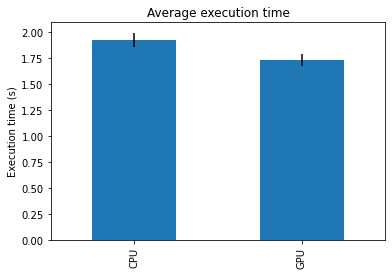

In [6]:
import os
import pandas as pd

FILENAME = 'tempos.csv'

if os.path.isfile(FILENAME):
    df = pd.read_csv(FILENAME)

by_version = df.groupby(by="platform", sort=False)
avg_time = by_version.mean()
std = by_version.std()
plt = avg_time.plot(legend=False, kind="bar", yerr=std, xlabel="")
plt.set_title("Average execution time")
plt.set_ylabel("Execution time (s)")

Não esqueça de subir de volta no repositório o código modificado. Isso facilita a correção, pois conseguimos ver facilmente as modificações que ocorreram nele. Talvez você tenha que fazer isso manualmente no site. 

In [ ]:
%%bash
cd pp/code/OpenMP

git config --global user.email "you@example.com"
git config --global user.name "Your Name"

git add main.cpp
git commit -m "Versão paralela"
git push

Discuta os resultados obtidos no arquivo README.md na raiz do seu repositório. 

Depois de concluido, envie o link do repositório para correção. 

**Bom trabalho a todos!** 